# p-values

Compute p-values and heavy tails estimators.

In [1]:
from jyquickhelper import add_notebook_menu

add_notebook_menu()

In [2]:
%matplotlib inline

## p-value table

In [3]:
from scipy.stats import norm
import pandas
from pandas import DataFrame
import numpy


def pvalue(p, q, N):
    theta = abs(p - q)
    var = p * (1 - p)
    bn = (2 * N) ** 0.5 * theta / var**0.5
    ret = (1 - norm.cdf(bn)) * 2
    return ret


def pvalue_N(p, q, alpha):
    theta = abs(p - q)
    var = p * (1 - p)
    rev = abs(norm.ppf(alpha / 2))
    N = 2 * (rev * var**0.5 / theta) ** 2
    return int(N + 1)


def alphatable(ps, dps, alpha):
    values = []
    for p in ps:
        row = []
        for dp in dps:
            q = p + dp
            r = pvalue_N(p, q, alpha) if 1 >= q >= 0 else numpy.nan
            row.append(r)
        values.append(row)
    return values


def dataframe(ps, dps, table):
    columns = dps
    df = pandas.DataFrame(data=table, index=ps)
    df.columns = dps
    return df


print("norm.ppf(0.025)", norm.ppf(0.025))  # -1.9599639845400545
ps = [0.001, 0.002] + [0.05 * i for i in range(1, 20)]
dps = [
    -0.2,
    -0.1,
    -0.02,
    -0.01,
    -0.002,
    -0.001,
    0.2,
    0.1,
    0.02,
    0.01,
    0.002,
    0.001,
]
dps.sort()
t = alphatable(ps, dps, 0.05)
dataframe(ps, dps, t)

norm.ppf(0.025) -1.9599639845400545


,-0.200,-0.100,-0.020,-0.010,-0.002,-0.001,0.001,0.002,0.010,0.020,0.100,0.200
0.001,NaN,NaN,NaN,NaN,NaN,7676,7676,1919,77,20,1.0,1.0
0.002,NaN,NaN,NaN,NaN,3834.0,15336,15336,3834,154,39,2.0,1.0
0.050,NaN,NaN,913.0,3650.0,91235.0,364939,364939,91235,3650,913,37.0,10.0
0.100,NaN,70.0,1729.0,6915.0,172866.0,691463,691463,172866,6915,1729,70.0,18.0
0.150,NaN,98.0,2449.0,9796.0,244893.0,979572,979572,244893,9796,2449,98.0,25.0
0.200,31.0,123.0,3074.0,12293.0,307317.0,1229267,1229267,307317,12293,3074,123.0,31.0
0.250,37.0,145.0,3602.0,14406.0,360137.0,1440548,1440548,360137,14406,3602,145.0,37.0
0.300,41.0,162.0,4034.0,16135.0,403354.0,1613413,1613413,403354,16135,4034,162.0,41.0
0.350,44.0,175.0,4370.0,17479.0,436966.0,1747864,1747864,436966,17479,4370,175.0,44.0
0.400,47.0,185.0,4610.0,18440.0,460976.0,1843901,1843901,460976,18440,4610,185.0,47.0


## p-values in 2D

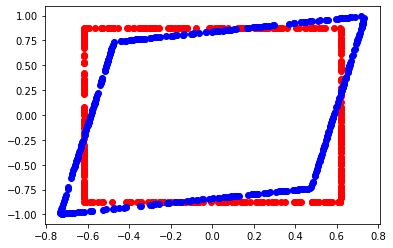

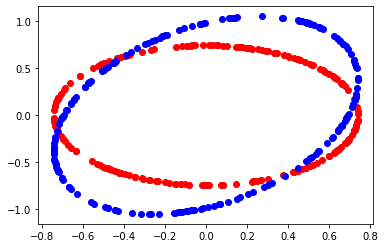

In [4]:
import numpy, matplotlib, random, math
import matplotlib.pyplot as pylab


def matrix_square_root(sigma):
    eigen, vect = numpy.linalg.eig(sigma)
    dim = len(sigma)
    res = numpy.identity(dim)
    for i in range(0, dim):
        res[i, i] = eigen[i] ** 0.5
    return vect * res * vect.transpose()


def chi2_level(alpha=0.95):
    N = 1000
    x = [random.gauss(0, 1) for _ in range(0, N)]
    y = [random.gauss(0, 1) for _ in range(0, N)]
    r = map(lambda c: (c[0] ** 2 + c[1] ** 2) ** 0.5, zip(x, y))
    r = list(r)
    r.sort()
    res = r[int(alpha * N)]
    return res


def square_figure(mat, a):
    x = []
    y = []
    for i in range(0, 100):
        x.append(a * mat[0][0] ** 0.5)
        y.append((random.random() - 0.5) * a * mat[1][1] ** 0.5 * 2)
        x.append(-a * mat[0][0] ** 0.5)
        y.append((random.random() - 0.5) * a * mat[1][1] ** 0.5 * 2)

        y.append(a * mat[1][1] ** 0.5)
        x.append((random.random() - 0.5) * a * mat[0][0] ** 0.5 * 2)
        y.append(-a * mat[1][1] ** 0.5)
        x.append((random.random() - 0.5) * a * mat[0][0] ** 0.5 * 2)

    pylab.plot(x, y, "ro")

    x = []
    y = []
    for i in range(0, 100):
        x.append(a)
        y.append((random.random() - 0.5) * a * 2)
        x.append(-a)
        y.append((random.random() - 0.5) * a * 2)

        y.append(a)
        x.append((random.random() - 0.5) * a * 2)
        y.append(-a)
        x.append((random.random() - 0.5) * a * 2)

    xs, ys = [], []
    for a, b in zip(x, y):
        ar = numpy.matrix([[a], [b]]).transpose()
        we = ar * root
        xs.append(we[0, 0])
        ys.append(we[0, 1])

    pylab.plot(xs, ys, "bo")
    pylab.show()


def circle_figure(mat, a):
    x = []
    y = []
    for i in range(0, 200):
        z = random.random() * math.pi * 2
        i = a * mat[0][0] ** 0.5 * math.cos(z)
        j = a * mat[0][0] ** 0.5 * math.sin(z)
        x.append(i)
        y.append(j)
    pylab.plot(x, y, "ro")

    x = []
    y = []
    for i in range(0, 200):
        z = random.random() * math.pi * 2
        i = a * math.cos(z)
        j = a * math.sin(z)
        x.append(i)
        y.append(j)

    xs, ys = [], []
    for a, b in zip(x, y):
        ar = numpy.matrix([[a], [b]]).transpose()
        we = ar * root
        xs.append(we[0, 0])
        ys.append(we[0, 1])

    pylab.plot(xs, ys, "bo")
    pylab.show()


level = chi2_level()
mat = [[0.1, 0.05], [0.05, 0.2]]
npmat = numpy.matrix(mat)
root = matrix_square_root(npmat)
square_figure(mat, 1.96)
circle_figure(mat, level)

## p-value ratio

In [5]:
import random, math


def densite_gauss(mu, sigma, x):
    e = -((x - mu) ** 2) / (sigma**2 * 2)
    d = 1.0 / ((2 * math.pi) ** 0.5 * sigma)
    return d * math.exp(e)


def simulation_vector(N, mu, sigma):
    return [random.gauss(mu, sigma) for n in range(N)]


def ratio(vector, x, fdensite):
    under = 0
    above = 0
    fx = fdensite(x)
    for u in vector:
        f = fdensite(u)
        if f >= fx:
            above += 1
        else:
            under += 1
    return float(above) / float(above + under)


x = 1.96
N = 10000
mu = 0
sigma = 1

v = simulation_vector(N, mu, sigma)
g = ratio(v, x, lambda y: densite_gauss(mu, sigma, y))
print(g)

0.9487


## p-values and EM

See [Applying the EM Algorithm: Binomial Mixtures](http://statisticalrecipes.blogspot.fr/2012/04/applying-em-algorithm-binomial-mixtures.html).

In [6]:
from scipy.stats import norm
import random, math


def average_std_deviation(sample):
    mean = 0.0
    var = 0.0
    for x in sample:
        mean += x
        var += x * x
    mean /= len(sample)
    var /= len(sample)
    var -= mean * mean
    return mean, var**0.5


def bootsample(sample):
    n = len(sample) - 1
    return [sample[random.randint(0, n)] for _ in sample]


def bootstrap_difference(sampleX, sampleY, draws=2000, confidence=0.05):
    diff = []
    for n in range(0, draws):
        if n % 1000 == 0:
            print(n)
        sx = bootsample(sampleX)
        sy = bootsample(sampleY)
        px = sum(sx) * 1.0 / len(sx)
        py = sum(sy) * 1.0 / len(sy)
        diff.append(px - py)
    diff.sort()
    n = int(len(diff) * confidence / 2)
    av = sum(diff) / len(diff)
    return av, diff[n], diff[len(diff) - n]


# generation of a sample


def generate_obs(p):
    x = random.random()
    if x <= p:
        return 1
    else:
        return 0


def generate_n_obs(p, n):
    return [generate_obs(p) for i in range(0, n)]


# std deviation


def diff_std_deviation(px, py):
    s = px * (1 - px) + py * (1 - py)
    return px, py, s**0.5


def pvalue(diff, std, N):
    theta = abs(diff)
    bn = (2 * N) ** 0.5 * theta / std
    pv = (1 - norm.cdf(bn)) * 2
    return pv


def omega_i(X, pi, p, q):
    np = p * pi if X == 1 else (1 - p) * pi
    nq = q * (1 - pi) if X == 1 else (1 - q) * (1 - pi)
    return np / (np + nq)


def likelihood(X, pi, p, q):
    np = p * pi if X == 1 else (1 - p) * pi
    nq = q * (1 - pi) if X == 1 else (1 - q) * (1 - pi)
    return math.log(np) + math.log(nq)


def algoEM(sample):
    p = random.random()
    q = random.random()
    pi = random.random()
    iter = 0
    while iter < 10:
        lk = sum([likelihood(x, pi, p, q) for x in sample])
        wi = [omega_i(x, pi, p, q) for x in sample]
        sw = sum(wi)
        pin = sum(wi) / len(wi)
        pn = sum([x * w for x, w in zip(sample, wi)]) / sw
        qn = sum([x * (1 - w) for x, w in zip(sample, wi)]) / (len(wi) - sw)

        pi, p, q = pin, pn, qn
        iter += 1

    lk = sum([likelihood(x, pi, p, q) for x in sample])
    return pi, p, q, lk


# mix
p, q = 0.20, 0.80
pi = 0.7
N = 1000
na = int(N * pi)
nb = N - na

print("------- sample")
sampleX = generate_n_obs(p, na) + generate_n_obs(q, nb)
random.shuffle(sampleX)
print("ave", p * pi + q * (1 - pi))
print("mea", sum(sampleX) * 1.0 / len(sampleX))

lk = sum([likelihood(x, pi, p, q) for x in sampleX])
print("min lk", lk, sum(sampleX) * 1.0 / len(sampleX))
res = []
for k in range(0, 10):
    r = algoEM(sampleX)
    res.append((r[-1], r))
res.sort()

rows = []
for r in res:
    pi, p, q, lk = r[1]
    rows.append([p * pi + q * (1 - pi)] + list(r[1]))

df = pandas.DataFrame(data=rows)
df.columns = ["average", "pi", "p", "q", "likelihood"]
df

------- sample
ave 0.38
mea 0.373
min lk -3393.2292120130046 0.373


,average,pi,p,q,likelihood
0,0.373,0.000324,0.341877,0.373010,-9358.705695
1,0.373,0.863747,0.284788,0.932204,-4531.967709
2,0.373,0.936083,0.346101,0.766941,-4490.512057
3,0.373,0.123023,0.290964,0.384508,-3563.557269
4,0.373,0.538835,0.053584,0.746213,-3487.438442
5,0.373,0.346351,0.057880,0.539974,-3302.391944
6,0.373,0.797540,0.376491,0.359248,-3144.938682
7,0.373,0.392520,0.592563,0.231131,-2902.915478
8,0.373,0.390241,0.459488,0.317648,-2778.903072
9,0.373,0.609127,0.338062,0.427447,-2764.987703


## p-value and heavy tail

In [7]:
from scipy.stats import norm, zipf
import sys


def generate_n_obs_zipf(tail_index, n):
    return list(zipf.rvs(tail_index, size=n))


def hill_estimator(sample):
    sample = list(sample)
    sample.sort(reverse=True)
    end = len(sample) / 10
    end = min(end, 100)
    s = 0.0
    res = []
    for k in range(0, end):
        s += math.log(sample[k])
        h = (s - (k + 1) * math.log(sample[k + 1])) / (k + 1)
        h = 1.0 / h
        res.append([k, h])
    return res


# mix
tail_index = 1.05
N = 10000

sample = generate_n_obs_zipf(tail_index, N)
sample[:5]

[357621, 148, 18, 1812876449, 36150]

[9999, 55186871.0339, 233342554.46156308]


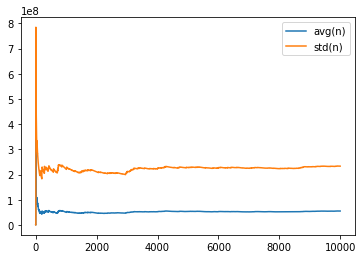

In [8]:
import pandas


def graph_XY(
    curves,
    xlabel=None,
    ylabel=None,
    marker=True,
    link_point=False,
    title=None,
    format_date="%Y-%m-%d",
    legend_loc=0,
    figsize=None,
    ax=None,
):
    if ax is None:
        import matplotlib.pyplot as plt  # pylint: disable=C0415

        fig, ax = plt.subplots(1, 1, figsize=figsize)

    smarker = {
        (True, True): "o-",
        (True, False): "o",
        (False, True): "-",
        # (False, False) :''
    }[marker, link_point]
    has_date = False
    for xf, yf, label in curves:
        ax.plot(xf, yf, smarker, label=label)
    ax.legend(loc=legend_loc)
    return ax


def draw_variance(sample):
    avg = 0.0
    std = 0.0
    n = 0.0
    w = 1.0
    add = []
    for i, x in enumerate(sample):
        x = float(x)
        avg += x * w
        std += x * x * w
        n += w
        val = (std / n - (avg / n) ** 2) ** 0.5
        add.append([i, avg / n, val])

    print(add[-1])
    table = pandas.DataFrame(add, columns=["index", "avg(n)", "std(n)"])
    return graph_XY(
        [
            [table["index"], table["avg(n)"], "avg(n)"],
            [table["index"], table["std(n)"], "std(n)"],
        ],
        marker=False,
        link_point=True,
    )


draw_variance(sample);

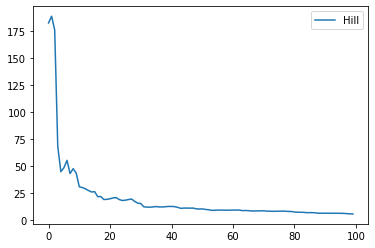

In [9]:
def draw_hill_estimator(sample):
    res = hill_estimator(sample)
    table = DataFrame(res, columns=["d", "hill"])
    return graph_XY(
        [
            [table["d"], table["hill"], "Hill"],
        ],
        marker=False,
        link_point=True,
    )


draw_hill_estimator(sample);

c:\python372_x64\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


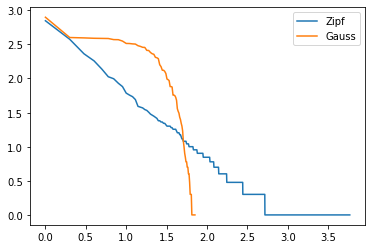

In [10]:
def draw_heavy_tail(sample):
    table = DataFrame([[_] for _ in sample], columns=["obs"])
    std = 1

    normal = norm.rvs(size=len(sample))
    normal = [x * std for x in normal]
    nortbl = DataFrame([[_] for _ in normal], columns=["obs"])
    nortbl["iobs"] = (nortbl["obs"] * 10).astype(numpy.int64)

    histon = nortbl[["iobs", "obs"]].groupby("iobs", as_index=False).count()
    histon.columns = ["iobs", "nb"]
    histon = histon.sort_values("nb", ascending=False).reset_index(drop=True)

    table["one"] = 1
    histo = table.groupby("obs", as_index=False).count()
    histo.columns = ["obs", "nb"]
    histo = histo.sort_values("nb", ascending=False).reset_index(drop=True)
    histo.reset_index(drop=True, inplace=True)
    histo["index"] = histo.index + 1

    vec = list(histon["nb"])
    vec += [
        0,
    ] * len(histo)
    histo["nb_normal"] = vec[: len(histo)]

    histo["log(index)"] = numpy.log(histo["index"]) / numpy.log(10)
    histo["log(nb)"] = numpy.log(histo["nb"]) / numpy.log(10)
    histo["log(nb_normal)"] = numpy.log(histo["nb_normal"]) / numpy.log(10)
    return graph_XY(
        [
            [histo["log(index)"], histo["log(nb)"], "Zipf"],
            [histo["log(index)"], histo["log(nb_normal)"], "Gauss"],
        ],
        marker=False,
        link_point=True,
    )


draw_heavy_tail(sample);